In [1]:
import cPickle
import pylab
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with open("mr3_pa1_s16_results.pickle", "r") as f:
    data = cPickle.load(f)

In [3]:
data.keys()

['respSel',
 'corrLive',
 'scan_freq',
 'resp',
 'rmsLive',
 'sel',
 'corrDark',
 'kurtLive',
 'normDark',
 'live',
 'stable',
 'skewLive',
 'normLive',
 'darkRatioLive',
 'MFELive',
 'dark',
 'ff',
 'jumpDark',
 'gainDark',
 'name',
 'gainLive',
 'DELive',
 'cal',
 'rmsDark',
 'jumpLive',
 'DEDark']

Let's look at some of the interesting statistics
# corrLive
Let me look at the corrLive key first

In [4]:
ts = data['corrLive']

In [5]:
sel = (ts>0) & (ts<1)

(array([1.4000e+01, 3.4000e+01, 7.1000e+01, 1.0300e+02, 1.3000e+02,
        1.5800e+02, 1.4800e+02, 1.7900e+02, 2.2600e+02, 2.1400e+02,
        2.8100e+02, 2.7400e+02, 2.7800e+02, 2.6600e+02, 2.4400e+02,
        2.2500e+02, 1.9800e+02, 1.9000e+02, 1.7600e+02, 1.6900e+02,
        1.9100e+02, 1.8900e+02, 2.0700e+02, 2.0400e+02, 2.0300e+02,
        2.0400e+02, 2.1100e+02, 1.9600e+02, 2.0400e+02, 2.1500e+02,
        2.1600e+02, 2.1600e+02, 1.8000e+02, 1.9000e+02, 1.8400e+02,
        1.9900e+02, 1.7500e+02, 1.7700e+02, 1.4300e+02, 1.4400e+02,
        1.2700e+02, 1.3100e+02, 1.2600e+02, 1.2400e+02, 1.1500e+02,
        1.1500e+02, 1.2100e+02, 1.3900e+02, 1.3300e+02, 1.4800e+02,
        1.6900e+02, 1.5900e+02, 1.7700e+02, 1.6200e+02, 1.7100e+02,
        1.8200e+02, 1.5800e+02, 1.9600e+02, 1.9800e+02, 2.3000e+02,
        2.5200e+02, 2.3500e+02, 2.6500e+02, 2.7700e+02, 3.1400e+02,
        3.4500e+02, 4.1100e+02, 4.2900e+02, 4.7900e+02, 5.2500e+02,
        5.5500e+02, 7.1200e+02, 8.0400e+02, 9.71

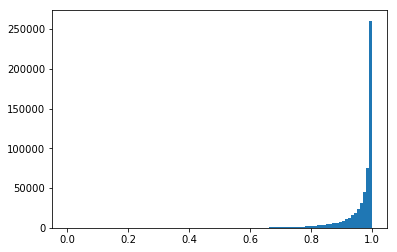

In [6]:
pylab.hist(ts[sel], bins=100)

It looks like that most of the detectors are highly correlated. However, one has to remember that these are all the detectors meaning that some of them are rejected based on this criteria. 

Next Let's try to plot only the selected detectors (uncutted) and only the unselected (cutted) respectively.

In [7]:
sel = data['sel'] ==1
dsel = data['sel'] == 0

(array([1.4000e+01, 3.4000e+01, 7.1000e+01, 1.0300e+02, 1.3000e+02,
        1.5800e+02, 1.4800e+02, 1.7900e+02, 2.2600e+02, 2.1400e+02,
        2.8100e+02, 2.7400e+02, 2.7800e+02, 2.6600e+02, 2.4400e+02,
        2.2500e+02, 1.9800e+02, 1.9000e+02, 1.7600e+02, 1.6900e+02,
        1.9100e+02, 1.8900e+02, 2.0700e+02, 2.0400e+02, 2.0300e+02,
        2.0400e+02, 2.1100e+02, 1.9600e+02, 2.0400e+02, 2.1500e+02,
        2.1600e+02, 2.1600e+02, 1.8000e+02, 1.9000e+02, 1.8400e+02,
        1.9900e+02, 1.7500e+02, 1.7700e+02, 1.4300e+02, 1.4400e+02,
        1.2700e+02, 1.3100e+02, 1.2600e+02, 1.2400e+02, 1.1500e+02,
        1.1500e+02, 1.2100e+02, 1.3900e+02, 1.3300e+02, 1.4800e+02,
        1.6900e+02, 1.5900e+02, 1.7700e+02, 1.6200e+02, 1.7100e+02,
        1.8200e+02, 1.5800e+02, 1.9600e+02, 1.9800e+02, 2.3000e+02,
        2.5200e+02, 2.3500e+02, 2.6500e+02, 2.7700e+02, 3.1400e+02,
        3.4500e+02, 4.1100e+02, 4.2900e+02, 4.7900e+02, 5.2500e+02,
        5.5500e+02, 7.1200e+02, 8.0400e+02, 9.71

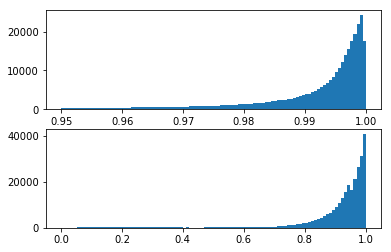

In [8]:
plt.subplot(2,1,1)
plt.hist(ts[sel], bins=100)
plt.subplot(2,1,2)
# for deselect let's get rid of numerical errors (peaks at 0 and 1)
ts_dsel = ts[dsel]
ts_dsel = ts_dsel[(ts_dsel<1)&(ts_dsel>0)]
plt.hist(ts_dsel, bins=100)

What one can see is that in the cutted region, it extends to lower correlation while for the uncutted (good) ones, it is sharply concentrated in the upper 5% correlation region. It means that 95% correlation threshold is used, but there are other criteria.

Next Let's look at a different statistics
# rmsLive

In [9]:
# With the previous study, we will go faster on this one and we will define a generic function

def study_stats(tag, cutoff, low=0):
    ts = data[tag]
    sel = (ts>low) & (ts<cutoff)
    #plt.subplot(3,1,1)
    plt.figure()
    plt.hist(ts[sel], bins=100)
    plt.xlabel(tag+", all")
    
    sel = data['sel'] ==1
    dsel = data['sel'] == 0
    #plt.subplot(3,1,2)
    plt.figure()
    sel = sel & ((ts>low) & (ts<cutoff))
    plt.hist(ts[sel], bins=100)
    plt.xlabel(tag+", sel=1")
    
    #plt.subplot(3,1,3)
    plt.figure()
    dsel = dsel & ((ts>low) & (ts<cutoff))
    plt.hist(ts[dsel], bins=100)
    plt.xlabel(tag+", sel=0")
    

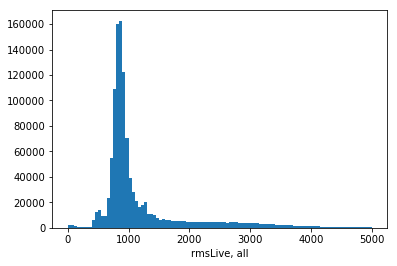

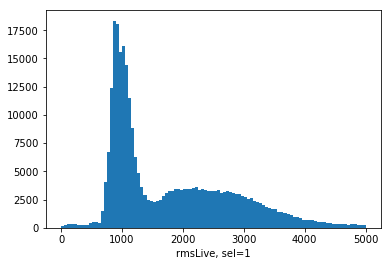

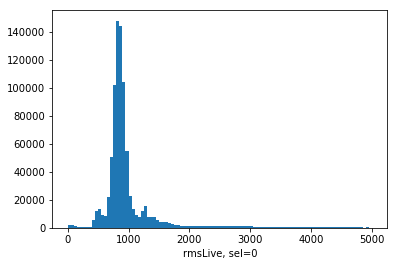

In [10]:
study_stats('rmsLive', 5e3)

One thing interesting is that sel=1 detectors have a peak that higher in rms than sel=0 detector, and sel=1 does look smoother, however, no clear cutoff thresholds are visible. 

Let's look at another stats
# kurtLive

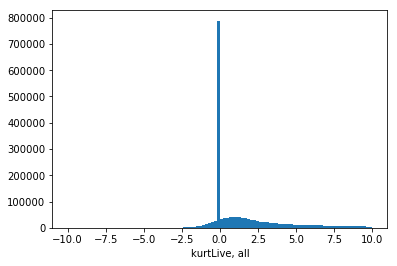

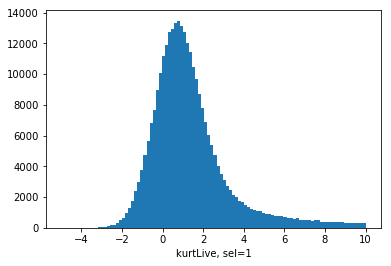

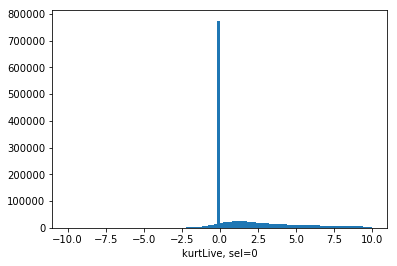

In [11]:
study_stats('kurtLive', 10,-10)

This is very interesting. The central peak is cut off, and the selected detectors have an extremely smooth curve, which I find remarkable. A comparison without the peak looks like the following

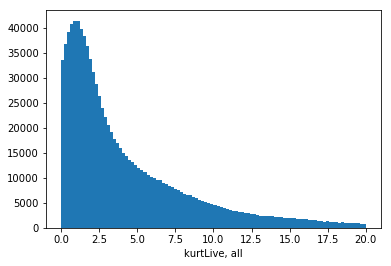

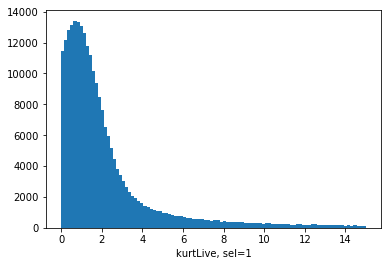

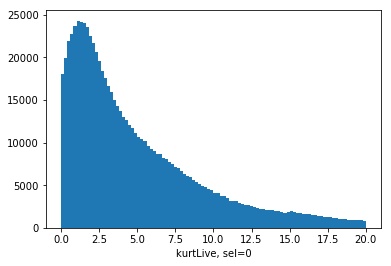

In [12]:
study_stats('kurtLive', 20,0)

One thing that can be seen is that the selected detectors drop master in higher kurtosis. Seems to indicate a bias made towards lower kurtosis in the preprocessing process. 
# corrDark

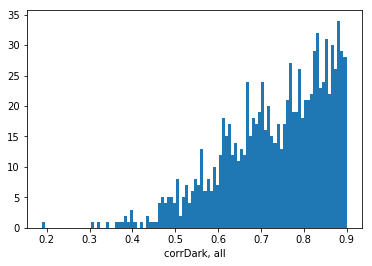

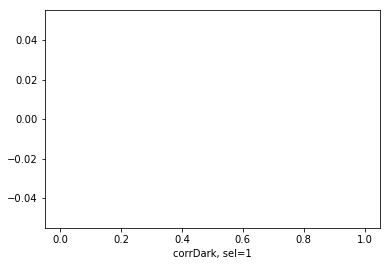

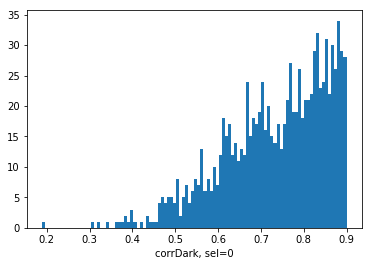

In [13]:
study_stats('corrDark', 0.9)

Selected detectors have no darkCorr defined? Interesting!

# resp
Responsitivity

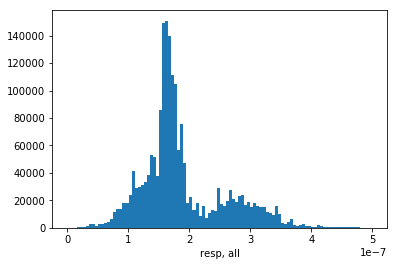

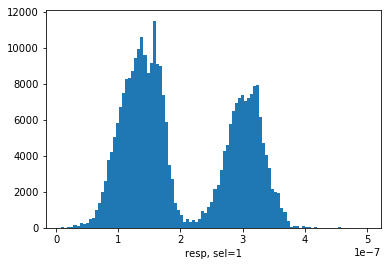

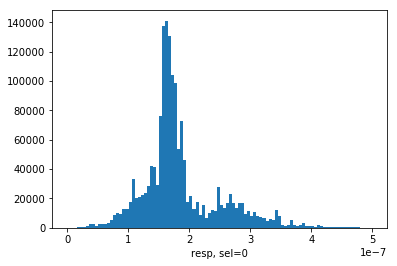

In [14]:
study_stats('resp', 5e-7)

The selected detectors have a very nice histogram. However, I am curious as in what causes the central peak (at around 1.8e-7) that has been removed (shown in the unselected).  

# ff
Flatfield

(array([  2.,   0.,   0.,  24.,  12.,  10.,   6.,   6.,   3.,  21.,  32.,
         65.,  60.,  62.,  31.,  32.,  23.,  17.,  15.,   6.,   4., 470.,
          8.,   3.,   5.,   7.,   7.,   2.,   4.,   2.,   6.,   7.,   6.,
          2.,   4.,   5.,   2.,   2.,   2.,   3.,   2.,   0.,   0.,   3.,
          2.,   4.,   1.,   2.,   2.,   2.,   3.,   2.,   2.,   1.,   1.,
          1.,   0.,   1.,   6.,   3.,   2.,   5.,   3.,   3.,   3.,   3.,
          4.,   1.,   1.,   1.,   0.,   3.,   2.,   0.,   0.,   0.,   1.,
          1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.27194095, 0.30660551, 0.34127007, 0.37593464, 0.4105992 ,
        0.44526376, 0.47992832, 0.51459288, 0.54925744, 0.583922  ,
        0.61858656, 0.65325112, 0.68791569, 0.72258025, 0.75724481,
        0.79190937, 0.82657393, 0.86123849, 0.89590305, 0.93056761,
        0.96523217, 0.99989673, 1.0345613 , 1.

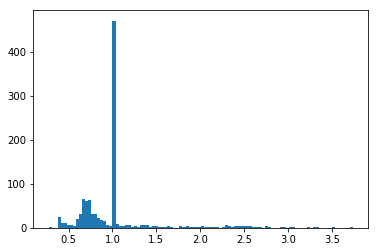

In [24]:
plt.hist(data['ff'], bins=100)

I also don't understand flatfield. 

# normLive

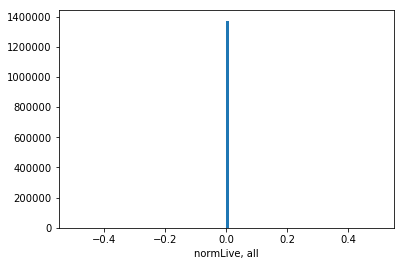

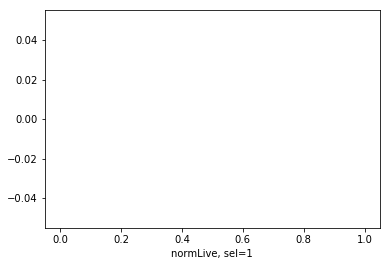

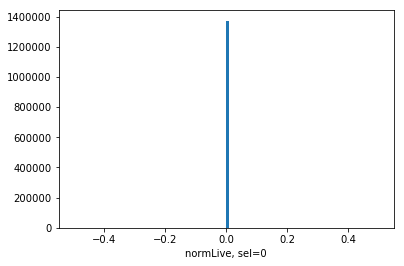

In [19]:
study_stats('normLive', 1, -1)

I don't understand what is this. 

# DEDark
Drift error dark

In [26]:
data['DEDark'].shape

(1842,)

This is a per TOD quantity


In [32]:
data['DEDark'][data['DEDark'] != None]

array([], dtype=object)

This is all filled with None, maybe it's worthing checking the other pickle file

# darkRatioLive


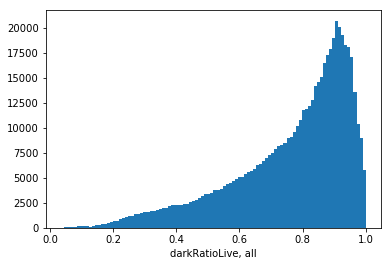

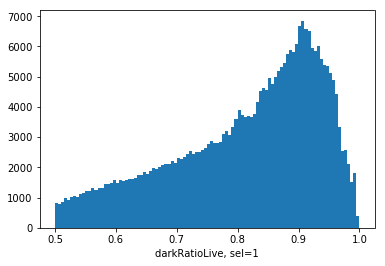

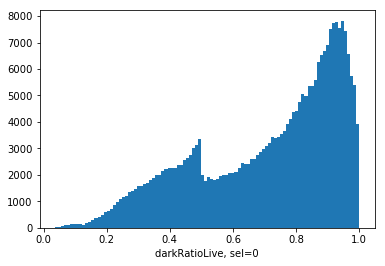

In [35]:
study_stats('darkRatioLive', 1)

Clearly dark ratio is trancated when considering

# jumpLive

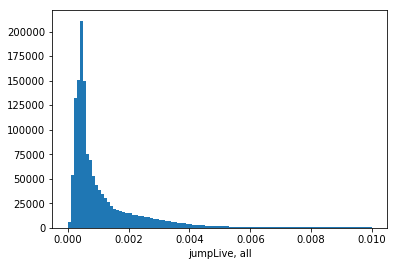

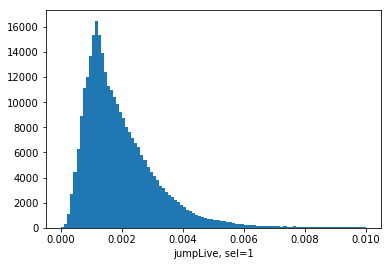

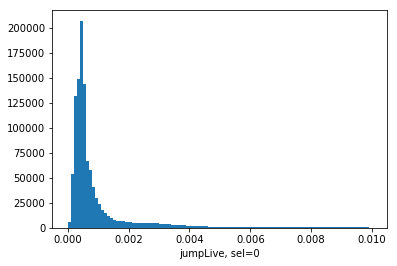

In [38]:
study_stats('jumpLive', 1e-2)

Once again, i don't fully understand the meaning of this. The selected detectors seem to have a wider shape than the unselected. However, it has a nicer shape. 

What's interesting is that it seems that the data reduction rate is very high, which means that a large fraction of data isn't get used. Let me calculate that ratio below

In [66]:
# Calculate the ratio of used detector data verses total

uniqs, counts = np.unique(data['sel'], return_counts=True)
tb = dict(zip(uniqs, counts))
print "Total detector data unused: %d" % tb[0]
print "Total detector data used: %d" % tb[1]
print "Percentage of data used:", round((tb[1]*1.0/(tb[0]+tb[1])*100.0),2), "%"

Total detector data unused: 1646201
Total detector data used: 298951
Percentage of data used: 15.37 %
